# Problem Description:

Here, we use the concepts of Linear Regression to solve the problem of Moore's Law using TensorFlow 2.0.

The notebook is organized as follows:

1. Imports
2. Reading the Data
3. Training the Model
4. Making Predictions

### Imports

In [1]:
import warnings
warnings.filterwarnings("ignore") 

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [3]:
from os import path

RESOURCES_PATH = path.dirname(path.realpath("__file__"))
DATA_PATH = path.join(RESOURCES_PATH, '../resources')
DATA = path.join(DATA_PATH, 'moore.csv')

In [4]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading the Data

In [6]:
data = pd.read_csv(DATA, header = None).to_numpy()

In [7]:
# Here, we are analysing the data of Moore's Law
# The data is a two dimensional array with the year and a count

data

array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

In [8]:
# Since the data values are only one dimensional, we reshape the data to get an N x D dimensional array

X = data[:, 0].reshape(-1, 1)
Y = data[:, 1]

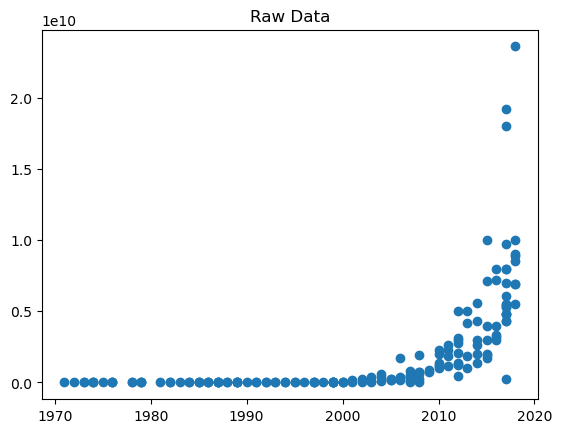

In [9]:
# Plot the data 

plt.scatter(X, Y)
plt.title("Raw Data");

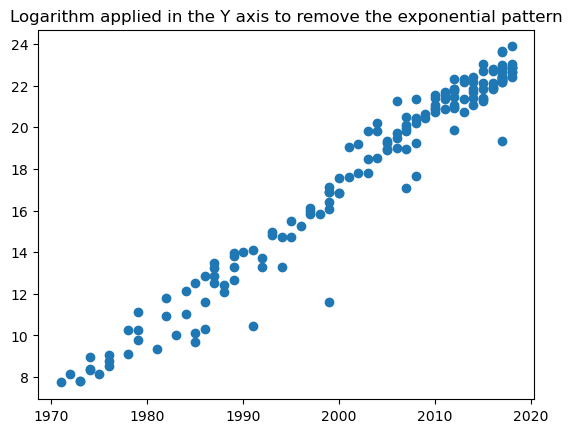

In [10]:
# As we can see, the data grows exponentially 
# Since we want a linear model to fit in the data, because we're doing a linear regression, we are going to take the log of the exponential data
# Logarithms and exponentials with the same base cancel each other. This is true because logarithms and exponentials are inverse operations
# The result of taking the log of Y is almost a straight line, which justifies our use of linear regression

Y = np.log(Y)
plt.scatter(X, Y)
plt.title("Logarithm applied in the Y axis to remove the exponential pattern");

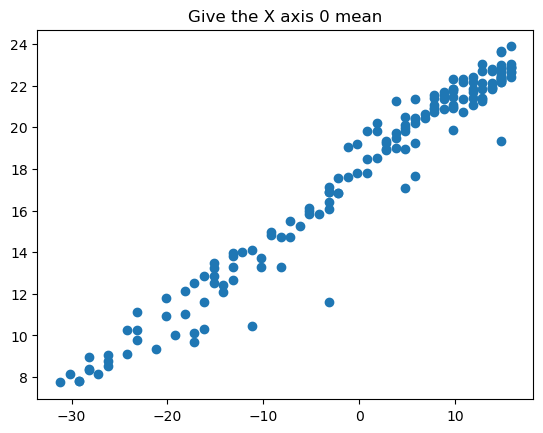

In [11]:
# The range of the input X varies from 1970 to 2020
# One good practice is to shift it down by its mean, giving it 0 mean by subtracting the mean
# Another thing we could do is also divide by the standard deviation
# But if we leave it like this, then we don't have to do the reverse transformation to scale it back
# At the same time, this will make the optimization of the learning process harder, so that's the trade off.

X = X - X.mean()
plt.scatter(X, Y)
plt.title("Give the X axis 0 mean");

### Training the Model

Since we are using the model for Regression, there is no need to specify an activation function.

In [12]:
# Build model

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = (1,)), 
    tf.keras.layers.Dense(1)
])

For the loss, we are trying to optimize the Mean Squared Error, represented as:

\begin{equation}
    MSE = \frac{1}{N} \sum_{i=1}^{N} (y_{i} - \hat{y_{i}})^{2}
\end{equation}

In [13]:
# When calling the optimizer, the first argument is the learning rate, and the second argument is momentum

model.compile(optimizer = tf.keras.optimizers.SGD(0.001, 0.9),
             loss = "mse",)

In [14]:
# Creating a custom schedule for the learning rate

def schedule(epoch, lr):
    if epoch >= 50:
        return 0.0001
    return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [15]:
r = model.fit(X, Y, epochs = 200, callbacks = [scheduler])

Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 380.7308 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 302.7466 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 269.5327 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 1ms/step - loss: 205.2519 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 168.1390 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 127.1417 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 88.3676 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 1ms/step - loss: 72.8958 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 57.4859 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 45.4328 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 1ms/step - loss: 4

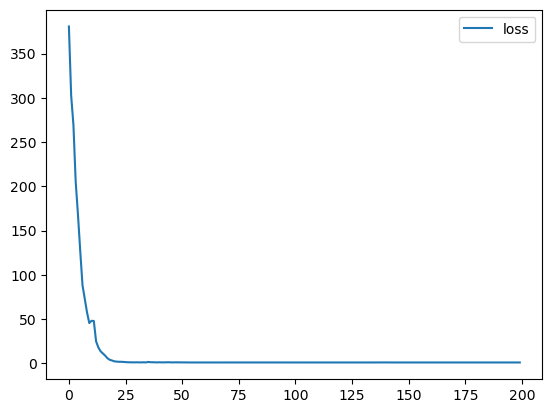

In [16]:
# Plot the loss

plt.plot(r.history["loss"], label = "loss")
plt.legend();

In [17]:
# By accessing the layers of the model, we can get a matrix of the weights computed
# We can interpret this slope because this tells us how fast the transistor count is growing every year according to Moore's Law

model.layers[0].get_weights()

[array([[0.3446829]], dtype=float32), array([17.758581], dtype=float32)]

In [24]:
# Accessing the item at row zero, column zero

a = model.layers[0].get_weights()[0][0, 0] 
print(f"Weight of the model: {a}")

Weight of the model: 0.344682902097702


Our original model for exponential growth is:

\begin{equation} 
    C = A_{0}r^{t} 
\end{equation}

We are interested in r, because that's the rate of growth. Given our regression weights, we know that:

\begin{equation}  
    a = 0.344683
\end{equation} 

so that:

\begin{equation} 
    r = e^{0.344683} = 1,411542
\end{equation} 

To solve (t' - t) we have:

\begin{equation}  
    t' -  t =  \frac{\log{2}}{\log{r}} = \frac{\log{2}}{a}
\end{equation}

In [25]:
print("According to Moore's Law, the time to double is: ", np.log(2) / a)

According to Moore's Law, the time to double is:  2.010970594542196


In [20]:
# We can also implement a mathematical manipulation for the linear regression and check that the values are nearly close

X = np.array(X).flatten()
Y = np.array(Y)
denominator = X.dot(X) - X.mean() * X.sum()
a = ( X.dot(Y) - Y.mean() * X.sum() ) / denominator
b = ( Y.mean() * X.dot(X) - X.mean() * X.dot(Y) ) / denominator

print(a, b)
print("Time to double: ", np.log(2) / a)

0.341682487387313 17.764939393631764
Time to double:  2.0286295205239204


### Making Predictions

6/6 [==============================] - 0s 2ms/step


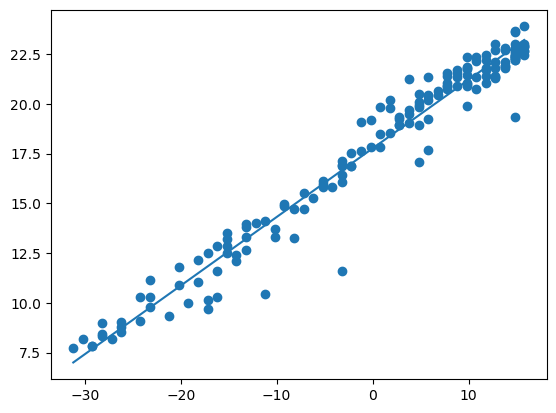

In [21]:
# From the plot bellow, we can check that the TF model was able to approximate the data really well in its predictions 

Y_hat = model.predict(X).flatten()
plt.scatter(X, Y)
plt.plot(X, Y_hat)

In [22]:
# We can also perform a manual calculation for the predictions

# Get the weights
w, b = model.layers[0].get_weights()

# Reshape X because we flattened it again earlier
X = X.reshape(-1, 1)

# (N x 1) x (1 x 1) + (1) --> (N x 1)
Y_hat2 = (X.dot(w) + b).flatten()

# Don't use == for floating points
np.allclose(Y_hat, Y_hat2)

True